In [13]:
# conda install -c conda-forge huggingface_hub

In [14]:
# pip install pytesseract

In [15]:
# pip install Pillow

In [16]:
# pip install easyocr

In [17]:
# pip install langchain

In [18]:

import functions as func

doEasyOCR = True
bigDataset = False


# Read dataset

In [19]:
# Read the dataset on pandas and join train and test
df = func.readDataSet(bigDataset)
print(f"Shape of the dataframe: {df.shape}")
df.head()

Shape of the dataframe: (15, 5)


,id,image,bboxes,ner_tags,tokens
0,doc7,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"[[53, 19, 175, 38], [600, 139, 745, 153], [188...","[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, ...","[PORTNET, cw9 olox %yg5, FACTURE, Facturation ..."
1,doc2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"[[99, 34, 286, 81], [642, 63, 802, 74], [514, ...","[3, 0, 0, 0, 13, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0,...","[KiTEA, Service Client:0802008002, FACTURE, KI..."
2,doc2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"[[99, 34, 286, 81], [642, 63, 802, 74], [514, ...","[3, 0, 0, 0, 13, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0,...","[KiTEA, Service Client:0802008002, FACTURE, KI..."
3,doc2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"[[50, 16, 216, 49], [790, 29, 952, 45], [47, 5...","[3, 0, 0, 13, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4,...","[AEON, Un Univers D'Expression, Aeon 360, Bd, ..."
4,doc5,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"[[399, 171, 544, 182], [748, 211, 887, 225], [...","[3, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, ...","[Auto-entrepreneur, Date : 28/03/2023, Facture..."


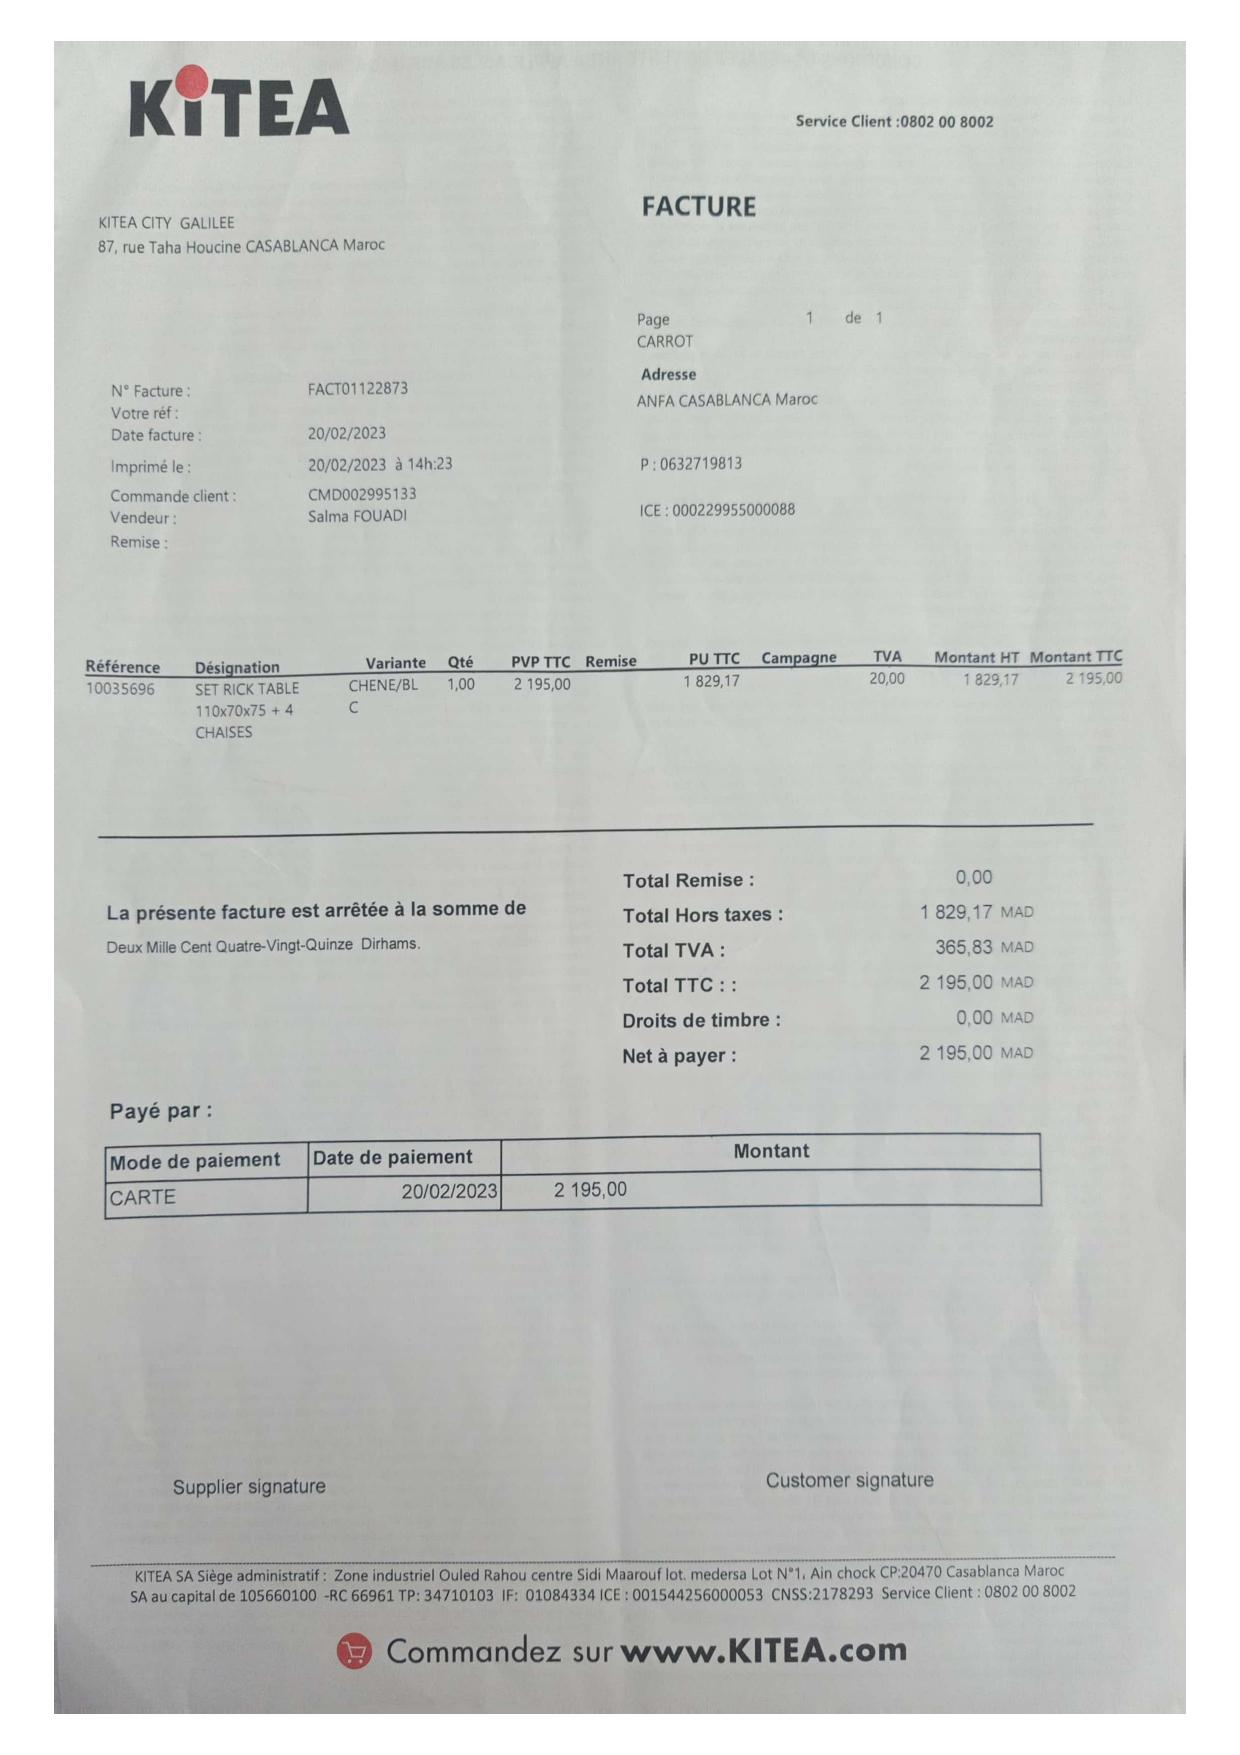

In [20]:
image_bytes = df["image"][1]["bytes"]

image = func.imageObjCreation(image_bytes)

# small_image = image.resize((200, 300))

# Display the image
image.show()

# OCR read images

In [21]:
textOcr = func.readImgOCR(image_bytes, image, doEasyOCR)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Texto extraído con OCR:
KITEA Service Client :0802 00 8002 FACTURE KITEA CITY GALILEE 87, rue Taha Houcine CASABLANCA Maroc Page CARROT Adresse N' Facture FACTO1122873 ANFA CASABLANCA Maroc Votre ref  Date facture 20/02/2023 Imprime le 20/02/2023 à 14h.23 P : 0632719813 Commande client CMDO02995133 Vendeur : Salma FOUADI ICE : 000229955000088 Remise Réference Désionation Variante Qté PVP TTC Remise PU TTC Campagne IVA Montant HI Montant IIC 10035696 SET RICK TABLE CHENE/BL 1,00 2 195,00 829,17 20,00 829 17 2 195,00 110x70x75 CHAISES Total Remise 0,00 La présente facture est arrêtée à la somme de Total Hors taxes 829,17 MAD Deux Mille Cent Quatre-Vingt-Quinze Dirhams Total TVA 365,83 MAD Total TTC 2 195,00 MAD Droits de timbre 0 00 MAD Net à payer 2 195,00 MAD Payé par Mode de paiement Date de paiement Montant CARTE 20/02/2023 2 195,00 Supplier signature Customer signature KITEA SA Siège administratif Zone industriel Ouled Rahou centre Sidi Maarouf lot. medersa Lot N'1, Ain chock CP 204

# LLM

In [22]:
parser = func.pydanticParser()

print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"description": "Facture Datamodel", "properties": {"date": {"default": null, "description": "Date of the facture", "title": "Date", "type": "string"}, "monto": {"default": null, "description": "Total money amount of the facture", "title": "Monto", "type": "string"}, "facture_number": {"default": null, "description": "Identifier of the facture", "title": "Facture Number", "type": "string"}}}
```


In [23]:

system_instructions, prompt = func.instructionsFormat(parser, textOcr)

print(system_instructions)
print(prompt)



You have to perform the task of extracting information from data.

Extract the data following the format:
The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"description": "Facture Datamodel", "properties": {"date": {"default": null, "description": "Date of the facture", "title": "Date", "type": "string"}, "monto": {"default": null, "description": "Total money amount of the facture", "title": "Monto", "type": "string"}, "facture_number": {"default": null, "description": "Identifier of the facture", "title": "Facture Number", "type": "string"}}}
```

Example:
Data: 'Invoice Date: 2023-07-16 I

In [24]:

generated_text = func.LLMModelCall(prompt, system_instructions)

# Parsear la respuesta generada usando PydanticOutputParser
facture_data = parser.parse(generated_text)
print(facture_data)


date='20/02/2023' monto='2 195,00 MAD' facture_number='FACTO1122873'
